# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Read JSON file into pandas DataFrame
json_data = pd.read_json('data/world_bank_projects.json')

In [5]:
#Find the top 10 countries with the most projects
top10countries = json_data.groupby('countryshortname').count().sort_values(by='_id',ascending=False).head(10)

In [6]:
#Format the top 10 countries DataFrame
top10countries = top10countries[['_id']]
top10countries.columns = ['count']
top10countries.index.name = 'Country Name'
top10countries

,count
Country Name,
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


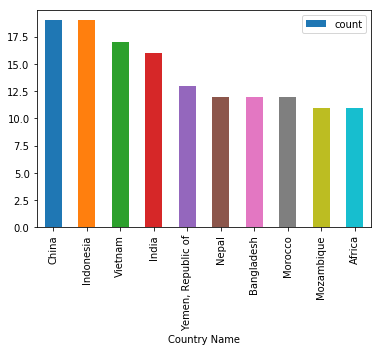

In [7]:
#Plot the top 10 countries in bar graph
top10countries.plot(y = 'count', kind='bar')
plt.show()

In [8]:
#identify data structure in 'mjtheme_namecode'
sample = json_data.loc[0,'mjtheme_namecode']
sample

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [9]:
#Create new column based on 'name' within 'mjtheme_namecode' column
json_data['mjtheme_namecode_new'] = json_data['mjtheme_namecode'].apply(lambda x: x[0]['name'])

In [10]:
#identify top 10 project themes
top10projectthemes = json_data.groupby('mjtheme_namecode_new').count().sort_values(by='_id',ascending=False).head(10)

In [11]:
#Format top 10 project themes DataFrame
top10projectthemes = top10projectthemes[['_id']]
top10projectthemes.columns = ['count']
top10projectthemes.index.name = 'Project Theme'
top10projectthemes

,count
Project Theme,
Environment and natural resources management,85
Human development,72
Public sector governance,64
Social protection and risk management,57
Rural development,56
Financial and private sector development,53
Social dev/gender/inclusion,43
Trade and integration,25
Urban development,23


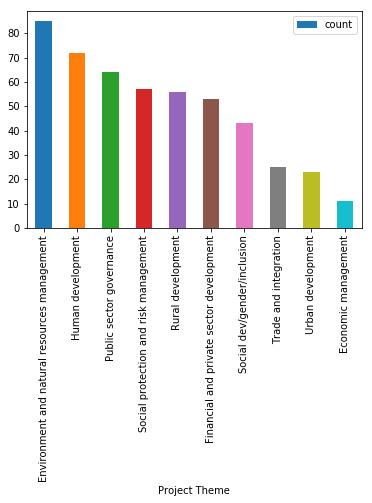

In [12]:
#Plot the top 10 project themes in bar graph
top10projectthemes.plot(y = 'count', kind='bar')
plt.show()

In [13]:
#Replace Missing Values
#a) Add new column with theme code
json_data['mjtheme_namecode_new_code'] = json_data['mjtheme_namecode'].apply(lambda x: x[0]['code'])

In [14]:
#b) Create dictionary of codes and corresponding names for themes
json_data2 = json_data[['mjtheme_namecode_new', 'mjtheme_namecode_new_code']]
json_data2 = json_data2.replace("", np.nan)
json_data2 = json_data2.dropna()
json_data2 = json_data2.drop_duplicates()
code_dict = dict(zip(json_data2.mjtheme_namecode_new_code, json_data2.mjtheme_namecode_new))
code_dict

{'8': 'Human development',
 '1': 'Economic management',
 '5': 'Trade and integration',
 '7': 'Social dev/gender/inclusion',
 '6': 'Social protection and risk management',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '10': 'Rural development',
 '9': 'Urban development',
 '4': 'Financial and private sector development',
 '3': 'Rule of law'}

In [15]:
#c) Map missing names using dictionary
json_data = json_data.replace("",np.nan)
print(json_data.mjtheme_namecode_new.value_counts())
json_data.mjtheme_namecode_new = json_data.mjtheme_namecode_new.fillna(json_data.mjtheme_namecode_new_code.map(code_dict))
print(json_data.mjtheme_namecode_new.value_counts())

Environment and natural resources management    85
Human development                               72
Public sector governance                        64
Social protection and risk management           57
Rural development                               56
Financial and private sector development        53
Social dev/gender/inclusion                     43
Trade and integration                           25
Urban development                               23
Economic management                             11
Rule of law                                      2
Name: mjtheme_namecode_new, dtype: int64
Environment and natural resources management    88
Human development                               72
Public sector governance                        66
Rural development                               57
Social protection and risk management           57
Financial and private sector development        54
Social dev/gender/inclusion                     44
Trade and integration                    

pandas.core.series.Series